In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='./raw_data/'
file_list=os.listdir(path)
file_list

['2549228714_701_963.txt',
 '2549228714_1_223.txt.txt',
 '2549228714_223_447.txt',
 '2549228714_963_1253.txt',
 '2549228714_1843_2138.txt',
 '2549228714_2138_2433.txt',
 '2549228714_1548_1843.txt',
 '2549228714_447_701.txt',
 '2549228714_1253_1548.txt']

In [3]:
f=open(path+file_list[0],'r')
for i,ll in enumerate(f.readlines()[8:20:6]):
    print(''.join(ll[:-1].split(':')[1:]))
    print(i)

因为亲人的不幸逝世，一位南非妹子通过画微型图来治愈自己的心，这一张张比指甲盖大不了多少的画，简直美哭了....[心][心] ​​
0
这只喵天生有一撇完美八字胡……出门自带“王者气质”…你们感受一下～[喵喵] ​​
1


In [4]:
# 8,14,20..... 8+6*x
wb_title=[]
wb_locate=[]
wb_create_time=[]
wb_like=[]
wb_repost=[]
wb_comment=[]
wb_tools=[]
print(file_list)
print(len(file_list))
for fi in file_list:
    temp_fi=open(path+fi,'r')
    for i,li in enumerate(temp_fi.readlines()[8:]):
        
        if i%6==0: # title
            wb_title.append(''.join(li[:-3].split(':')[1:]))
        if i%6==1: # 发布位置
            wb_locate.append(li[6:-1])
        if i%6==2: # 发布时间
            wb_create_time.append(li[6:-1])
        if i%6==3: # 各种参数
            wb_like.append(int(li.split()[1]))
            wb_repost.append(int(li.split()[3]))
            wb_comment.append(int(li.split()[5]))
        if i%6==4: # 发布工具
            wb_tools.append(li[6:-1])
        
    
    

['2549228714_701_963.txt', '2549228714_1_223.txt.txt', '2549228714_223_447.txt', '2549228714_963_1253.txt', '2549228714_1843_2138.txt', '2549228714_2138_2433.txt', '2549228714_1548_1843.txt', '2549228714_447_701.txt', '2549228714_1253_1548.txt']
9


In [5]:
print(len(wb_title))
print(len(wb_locate))
print(len(wb_create_time))
print(len(wb_like))
print(len(wb_repost))
print(len(wb_comment))

23135
23135
23135
23135
23135
23135


In [6]:
wb_title[0:10]

['因为亲人的不幸逝世，一位南非妹子通过画微型图来治愈自己的心，这一张张比指甲盖大不了多少的画，简直美哭了....[心][心] ',
 '这只喵天生有一撇完美八字胡……出门自带“王者气质”…你们感受一下～[喵喵] ',
 '该微博因被多人举报，根据《微博社区管理规定》，已被删除。查看帮助：http//t.cn/Rfd1',
 '美国萨拉托加有这么一对小情侣....女票Catana经常偷偷用画笔记录着她和男票的日常....最近男票看到了这些漫画，心顿时被暖化了....他把漫画po上了网…这恩爱秀的，我给满分...[心] ',
 '又到了年底要做新年计划的时候....  给胖纸们一组对比.....  留着保存起来在新一年里继续激励自己吧[抱抱][抱抱][污] ',
 '练了30年的刀工，终成大师....  现在，他切一跟火腿，能赚4000美元......... ',
 '这些人，成了inst上的混账父母.......然而点进去一看，笑趴........[笑cry] ',
 '#机场之吻# 忙碌的日子，有时会让人无暇顾及身边的美好。可到了圣诞季，仿佛思念的感觉也变浓了。如梦似幻的重逢，赫尔辛基机场的空气里弥漫着喜悦的味道！一个拥吻，抵过千言万语。分享亲吻照，赢取钻石戒指秒拍视频 ',
 '自从这群歪果仁尝试了微信红包以后。。。[二哈] #歪果仁研究协会# 唯喔fanTV的秒拍视频 ',
 '她，一只原本要被安乐死的母马，却幸运有了一位为她导盲的骆驼~~   她成了他的陪伴，而他延续着她的生命...  一马一骆驼，他们的世界，很美好~ ']

In [7]:
all_wb=pd.DataFrame(data={'title':wb_title,'create_time':wb_create_time,
                   'like':wb_like,'repost':wb_repost,'comment':wb_comment,
                   'locate':wb_locate,'tools':wb_tools})

In [8]:
all_wb.shape

(23135, 7)

In [9]:
all_wb=all_wb.sort_values(by=['create_time'],ascending=True)
all_wb.index=np.array(range(all_wb.shape[0]))

In [10]:
all_wb.loc[11800,:]

comment                                                     3939
create_time                                     2015-08-17 20:41
like                                                        3197
locate                                                         无
repost                                                      7019
title          BBC推送： 7点25分左右泰国曼谷市中心发生大爆炸.... 在市中心旅游景点四面佛附近.....
tools                                               微博 weibo.com
Name: 11800, dtype: object

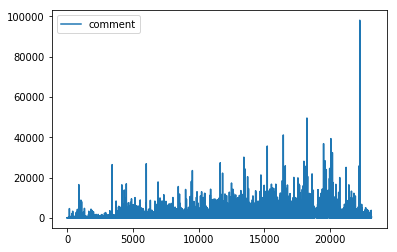

In [11]:
%matplotlib inline
fig=plt.figure()

all_wb['comment'].plot()
plt.legend(loc='best')


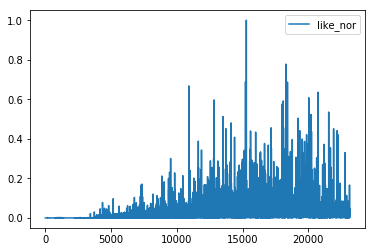

In [12]:
%matplotlib inline
fig=plt.figure()

max_like=np.max(all_wb.like)
min_like=np.min(all_wb.like)
all_wb['like_nor']=all_wb['like'].apply(lambda x: (x - min_like) / (max_like - min_like))

all_wb['like_nor'].plot()
plt.legend(loc='best')

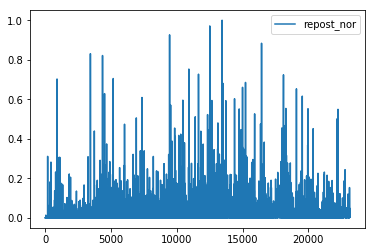

In [13]:
%matplotlib inline
fig=plt.figure()

max_repost=np.max(all_wb.repost)
min_repost=np.min(all_wb.repost)
all_wb['repost_nor']=all_wb['repost'].apply(lambda x: (x - min_repost) / (max_repost - min_repost))

all_wb['repost_nor'].plot()
plt.legend(loc='best')

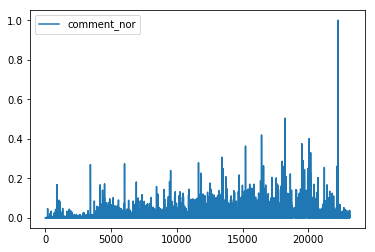

In [14]:
%matplotlib inline
fig=plt.figure()

max_comment=np.max(all_wb.comment)
min_comment=np.min(all_wb.comment)
all_wb['comment_nor']=all_wb['comment'].apply(lambda x: (x - min_comment) / (max_comment - min_comment))

all_wb['comment_nor'].plot()
plt.legend(loc='best')

In [15]:
wb_avg_like=[]
period=30
for i,like in enumerate(all_wb.like_nor):
    if i>period:
        temp_max=np.max(all_wb.like_nor[i-period:i])
        temp_min=np.min(all_wb.like_nor[i-period:i])
        avg_=np.sum(all_wb.like_nor[i-period:i])-temp_max-temp_min
        avg_=avg_/(period+1)
        wb_avg_like.append(avg_)
    else:
        wb_avg_like.append(0)
print(wb_avg_like[10000:15000])

[0.010060050515788559, 0.010026149263414922, 0.010772269067810543, 0.010786881676592286, 0.0108576067030959, 0.010808946715852709, 0.011447371593526904, 0.011518096620030527, 0.010767300780824749, 0.010779429246113593, 0.011042602330272723, 0.010264188660469463, 0.009655865756885642, 0.010052451959222055, 0.00963818450025974, 0.009417972485918927, 0.009274915045945697, 0.009584702352118573, 0.009569943617249015, 0.010610215236421049, 0.010363700526273105, 0.010581866775384476, 0.010968662529837121, 0.010743043850247064, 0.010641778471389609, 0.009171311649683165, 0.009098686984037919, 0.009262494328481216, 0.008954752787537781, 0.008373901588463637, 0.008715106003517254, 0.00853800118508257, 0.007871958476810886, 0.008270590444376738, 0.008434105536644405, 0.008355635827486461, 0.00782008371563571, 0.007980676286147027, 0.008406049327783462, 0.008670099168469496, 0.008442726975825631, 0.009116075988488187, 0.009713439435485697, 0.009597415321758687, 0.009726298531213632, 0.009921815236

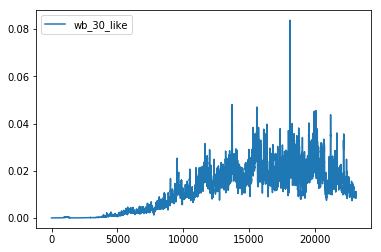

In [16]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_like,label='wb_'+str(period)+'_like')
plt.legend(loc='best')

In [17]:
wb_avg_like=[]
period=30
for i,like in enumerate(all_wb.like_nor[10000:15000]):
    if i>period:
        temp_max=np.max(all_wb.like_nor[10000+i-period:10000+i])
        temp_min=np.min(all_wb.like_nor[10000+i-period:10000+i])
        avg_=np.sum(all_wb.like_nor[10000+i-period:10000+i])-temp_max-temp_min
        avg_=avg_/(period+1)
        wb_avg_like.append(avg_)
    else:
        wb_avg_like.append(0)


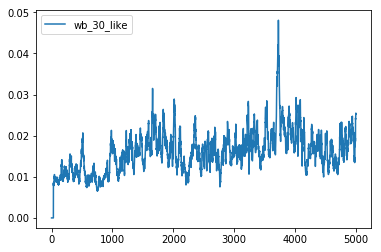

In [18]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_like,label='wb_'+str(period)+'_like')
plt.legend(loc='best')


In [19]:
wb_avg_repost=[]
period=30
for i,like in enumerate(all_wb.repost_nor):
    if i>period:
        temp_max=np.max(all_wb.repost_nor[i-period:i])
        temp_min=np.min(all_wb.repost_nor[i-period:i])
        avg=np.sum(all_wb.repost_nor[i-period:i])-temp_max-temp_min
        avg=avg/(period+1)
        wb_avg_repost.append(avg)
    else:
        wb_avg_repost.append(0)

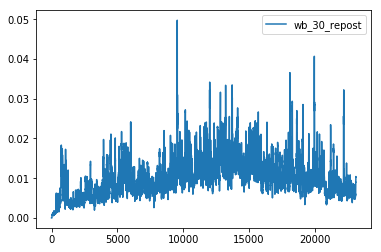

In [20]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_repost,label='wb_'+str(period)+'_repost')
plt.legend(loc='best')

In [21]:
wb_avg_comment=[]
period=30
for i,like in enumerate(all_wb.comment_nor):
    if i>period:
        temp_max=np.max(all_wb.comment_nor[i-period:i])
        temp_min=np.min(all_wb.comment_nor[i-period:i])
        avg=np.sum(all_wb.comment_nor[i-period:i])-temp_max-temp_min
        avg=avg/(period+1)
        wb_avg_comment.append(avg)
    else:
        wb_avg_comment.append(0)

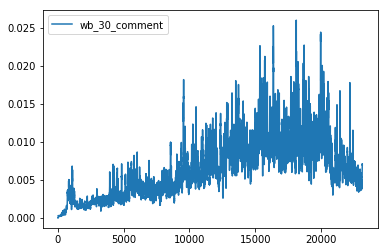

In [22]:
%matplotlib inline
fig=plt.figure()
plt.plot(wb_avg_comment,label='wb_'+str(period)+'_comment')
plt.legend(loc='best')

In [23]:
sub_weibo=all_wb[11800:]

In [24]:
sub_weibo.to_csv('left_11335.csv')